# Derivation of gain

**Scott Prahl**

**June 2024**

In this notebook, the equations for the gain for a single, three-port, sphere with and without a baffle are derived.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iadpython
%config InlineBackend.figure_format='retina'

## Substitution vs Replacement Measurements

Integrating spheres are most easily used to make relative (rather than absolute) measurements.  The total reflected light from a sample is compared to a standard or to the light hitting the sphere wall directly.

This section will calculate the measured relative value for a particular experiment.

## Definitions

If we look at a cross-section of an integrating sphere used in to measure transmission (left, below) and reflection (right, below) then we can see the diameters for the sphere and each of the ports.  In the figure below, the detector port is drawn bigger than usual. Also, in the transmission experiment shown on the left, the empty port is often capped with a cover that  matches the internal coating of the integrating sphere.  In this case, the area of the empty port becomes zero and so the wall area for the transmission experiment is greater that fo the reflection experiment.

<center>
    <img src="sphere.png" width="70%" />
</center>

The associated areas are: sphere $A_\mathrm{sphere}$, the sample port $A_\mathrm{sample}$, the detector port $A_\mathrm{detector}$, the empty port $A_\mathrm{empty}$, and the sphere walls $A_\mathrm{walls}$.  Each port also has a reflectance value for diffuse incidence: $r_\mathrm{sample}$, $r_\mathrm{detector}$, $r_\mathrm{empty}$, and $r_\mathrm{walls}$.  The empty port has $r_\mathrm{empty}\equiv0$ by definition.

The total surface area of the sphere is equal to the sum of the wall area and the spherical cap area for each port

$$
A_\mathrm{sphere} = A_\mathrm{wall} + A_\mathrm{sample} +  A_\mathrm{detector} +  A_\mathrm{empty}
$$

The relative area of the sample is obtained by dividing all areas by the total surface area of the sphere $A_\mathrm{sphere}$. Thus

$$
a_\mathrm{wall} = 1 -  a_\mathrm{sample} - a_\mathrm{detector} - a_\mathrm{empty}
$$

## The simplest sphere model

The simplest possible model for the effect of the integrating sphere assumes no light is reflected any of the ports ($r_\mathrm{sample}=0$, $r_\mathrm{detector}=0$, $r_\mathrm{empty}=0$). Since neither the sample nor the detector reflect light, there can be no light moving from one to the other and so it does not matter if a baffle is present or not.

$$
P_\mathrm{wall} =  \frac{a_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}} \cdot P
$$

Since the power/area is equal for the detector and the sphere wall
$$
\frac{P_\mathrm{detector}}{A_\mathrm{detector}}=\frac{P_\mathrm{wall}}{A_\mathrm{wall}}
$$

so

$$
P_\mathrm{detector} =  \frac{a_\mathrm{detector}}{a_\mathrm{wall}}P_\mathrm{wall} = a_\mathrm{detector} \frac{1}{1-r_\mathrm{wall}a_\mathrm{wall}} \cdot P 
= a_\mathrm{detector} G_\mathrm{simple} \cdot P
$$

where the gain is defined as the increase on the detector (relative to a black sphere) 

$$
G_\mathrm{simple} = \frac{1}{1-r_\mathrm{wall}a_\mathrm{wall}}
$$

where, of course, $G_\mathrm{simple}=1$ when $r_\mathrm{wall}=0$.

## A sphere model with no baffle but with sample and detector ports

<center>
    <img src="sphere2.png" width="50%" />
</center>

### The power on the detector port (no baffle configuation)

Generally, the sample reflectivity is not zero and therefore must be included in the model.  Again, we start with a diffuse light power $P$ inside the sphere.  Assuming that there are no baffles, the first incidence will be  

$$
\mbox{zero bounce wall power} = a_\mathrm{wall} P
$$

The second incidence will be everything that is reflected.  Again, because there are no baffles

$$
\text{first bounce wall power} = a_\mathrm{wall}\cdot (r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample}
+ r_\mathrm{third} a_\mathrm{third})\cdot P
$$

The $k^{th}$ bounce will be

$$
k^{th}\mbox{ bounce wall power} = a_\mathrm{wall} \cdot (r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample}
+ r_\mathrm{third} a_\mathrm{third})^k \cdot P
$$

Adding everything together, we get the total power on the walls

$$
P_\mathrm{wall} = \frac{a_\mathrm{wall}}{1-r_\mathrm{wall} a_\mathrm{wall} - r_\mathrm{detector} a_\mathrm{detector} - r_\mathrm{sample} a_\mathrm{sample}
- r_\mathrm{third} a_\mathrm{third}} \cdot P
$$

The power falling on the detector is 

$$
P_\mathrm{detector} = \frac{a_\mathrm{detector}}{1-r_\mathrm{wall} a_\mathrm{wall} - r_\mathrm{detector} a_\mathrm{detector} - r_\mathrm{sample} a_\mathrm{sample}
- r_\mathrm{third} a_\mathrm{third}} \cdot P
$$

Here, $a_\mathrm{third}$ refers to the third port in the sphere.  There is a detector port and a sample port.  In a reflectance sphere the third port is empty and is the entrance port.  In a transmission sphere the third port is usually closed and blocked with a reflection standard or left
open so that transmitted light may leave.  

### The gain due to the sphere (no baffle configuation)

The sphere gain $G(r_\mathrm{sample})$ can be defined as

$$
G_\text{no-baffle} = \frac{1}{1-r_\mathrm{wall} a_\mathrm{wall} - r_\mathrm{detector} a_\mathrm{detector} - r_\mathrm{sample} \cdot a_\mathrm{sample}
- r_\mathrm{third} \cdot a_\mathrm{third}}
$$

which represents the increase in light on the detector due to sphere effects.  The gain can be thought of as ratio of the detector powers in the sphere to a black sphere (one with perfectly absorbing walls).  Thus, $G_\text{no-baffle}=1$ when $r_w=0$.  The gain obviously increases with sphere wall reflectivity.  

The sphere gain $G_\text{no-baffle}$ is does constant for different sample reflectivities  $r_\mathrm{sample}$.  The gain or sphere efficiency increases with increasing reflectance of the sample.  

Finally, we note that $G_\text{no-baffle} = G_\text{simple}$ when $r_\mathrm{detector}=0$, $r_\mathrm{sample}=0$ and $r_\mathrm{third}=0$.

### Calculating the gain based on the detected light (no baffle configuation)

The optical power falling on the detector port is

$$
P_\mathrm{detector}=  a_\text{detector} G_\text{no-baffle}\cdot P
$$

The light that reaches the detector must be transmitted through the detector port and therefore is  reduced by $1-r_\mathrm{detector}$, so

$$
P_\mathrm{detected} = (1-r_\mathrm{detector})P_\mathrm{detector}
$$

If $P_0$ is the collimated, normally-incident light power on a sample, then $P = \mathrm{UX1}\cdot  P_0$ is the power reflected by or transmitted through the sample.  Here $\mathrm{UX1}$ might be $\mathrm{UR1}$ for a reflection experiment or $\mathrm{UT1}$ for a transmission experiment. Thus,

$$
P_\mathrm{detected} = a_\mathrm{detector} (1-r_\mathrm{detector}) G_\text{no-baffle}(r_\mathrm{sample}) \cdot \mathrm{UX1}\cdot P_0
$$

This gain can be recovered from normalized number of photons reaching the detector in a Monte Carlo simulation of photons within the sphere

$$
G_\text{no-baffle} = \frac{P_\mathrm{detected}}{P_0} \frac{1}{a_\mathrm{detector} (1-r_\mathrm{detector})\cdot \mathrm{UX1} }  
$$

This is done in the sphere-gain-test.ipynb notebook.

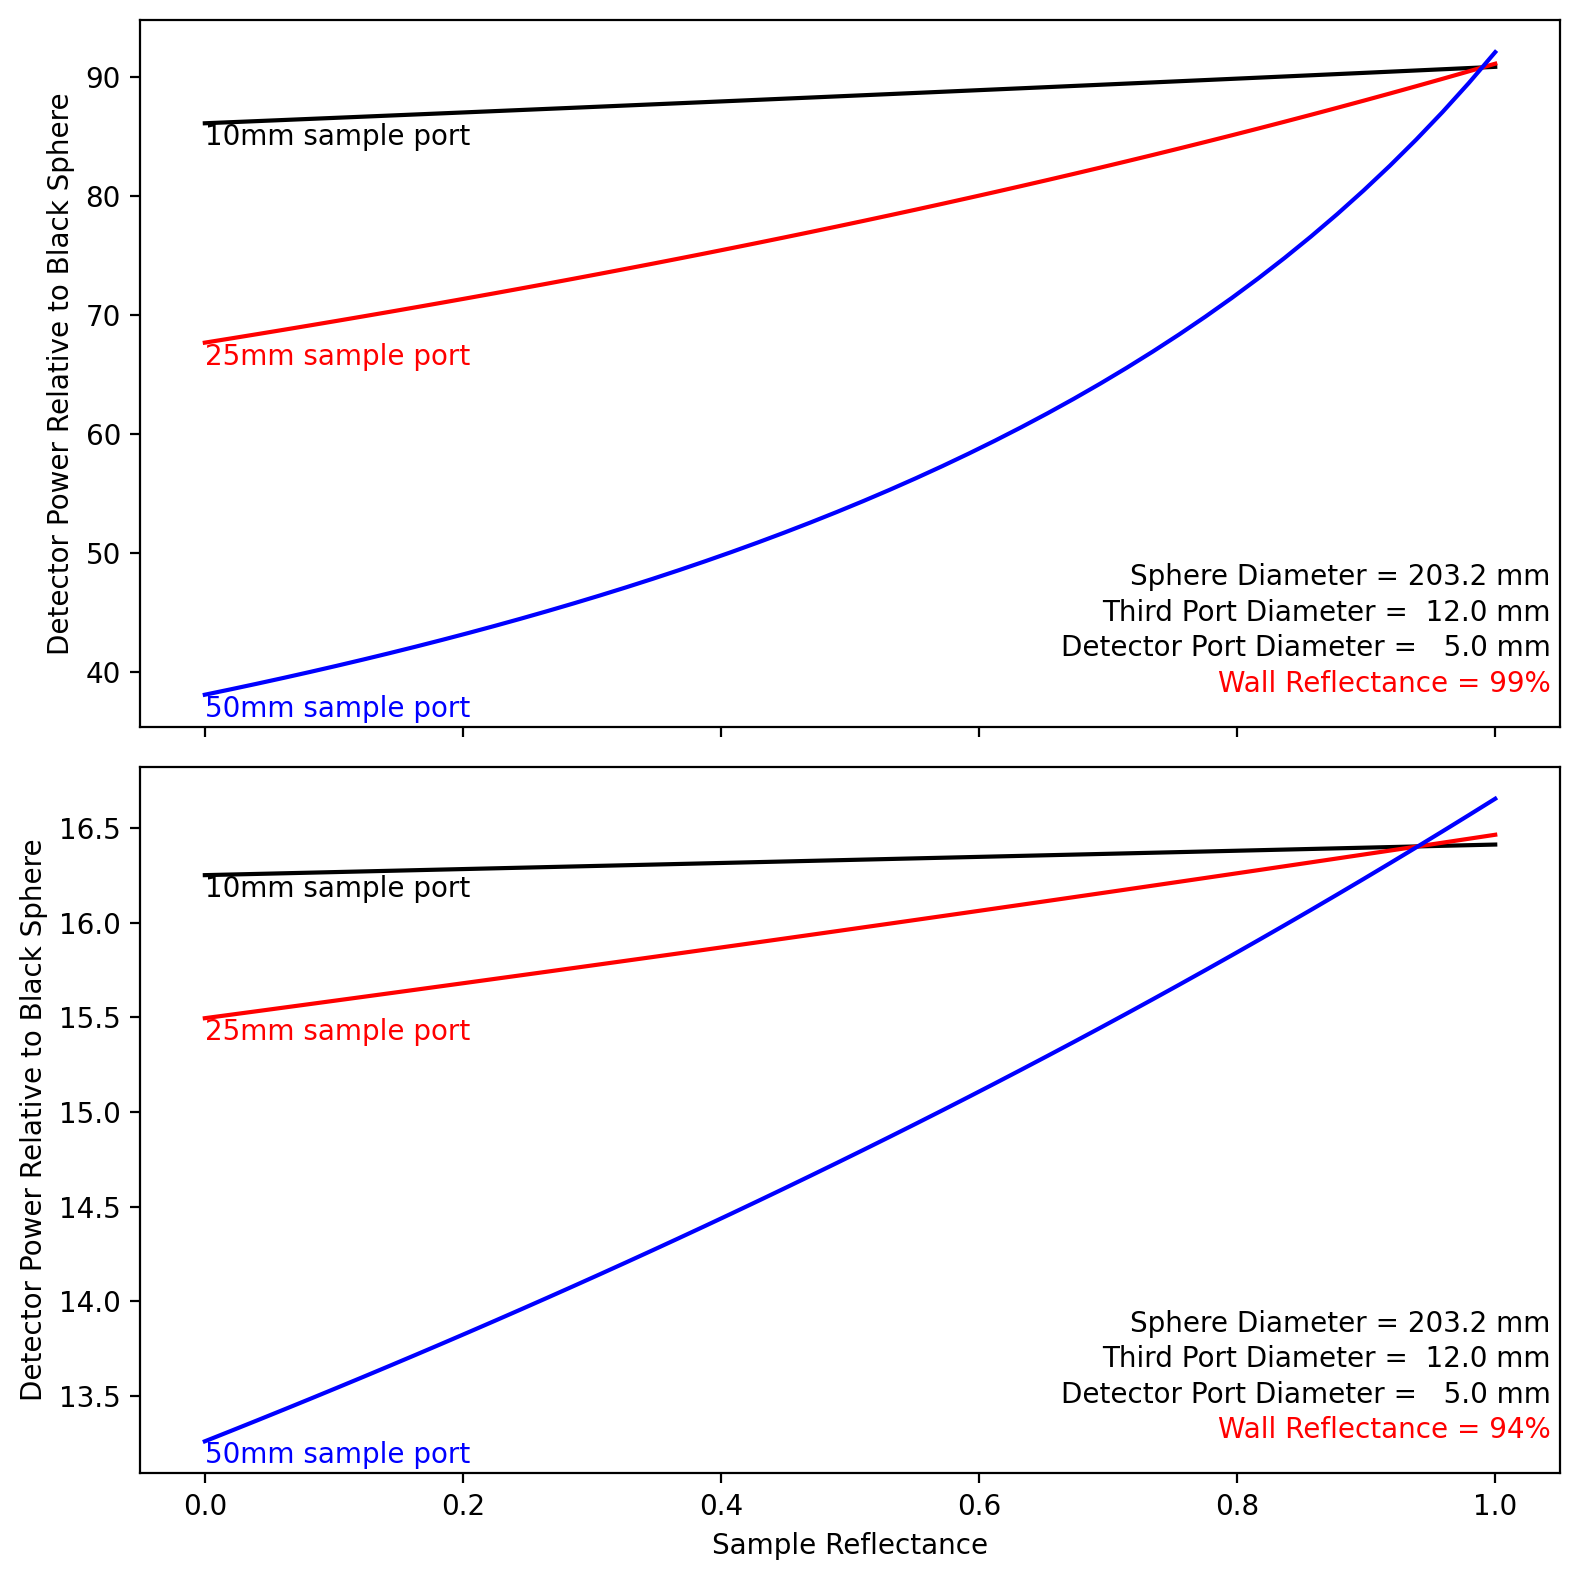

In [2]:
r_sample = np.linspace(0.0,1,50)
d_sphere = 25.4*8 #mm
d_sample = 25.4
s = iadpython.Sphere(d_sphere, d_sample, r_wall=0.99, d_detector=5, d_third=12)
s.baffle = False

plt.figure(figsize=(8,8))

s.sample.d = 10
gain = s.gain(sample_uru=r_sample, third_uru=0)

plt.subplot(2,1,1)
plt.plot(r_sample, gain, color='black')
plt.text(r_sample[0], gain[0],'%gmm sample port'%(s.sample.d), color='black', va='top')

s.sample.d=25
gain = s.gain(sample_uru=r_sample, third_uru=0)
plt.plot(r_sample, gain, color='red')
plt.text(r_sample[0], gain[0],'%gmm sample port'%(s.sample.d), color='red', va='top')

s.sample.d=50
gain = s.gain(sample_uru=r_sample, third_uru=0)
label='$d_{sample}$=%.2f, %.0fmm sphere'%(s.a_wall,s.d)
plt.plot(r_sample, gain, color='blue')
plt.text(r_sample[0], gain[0],'%gmm sample port'%(s.sample.d), color='blue', va='top')

#plt.xlabel('Sample Reflectance')
plt.gca().set_xticklabels([])
plt.ylabel('Detector Power Relative to Black Sphere')
plt.text(1,0.20,"Sphere Diameter = %5.1f mm "%s.d, ha='right', transform=plt.gca().transAxes)
plt.text(1,0.15,"Third Port Diameter = %5.1f mm "%(s.third.d), ha='right',transform=plt.gca().transAxes)
plt.text(1,0.10,"Detector Port Diameter = %5.1f mm "%(s.detector.d), ha='right',transform=plt.gca().transAxes)
plt.text(1,0.05,"Wall Reflectance = %g%% "%(100*s.r_wall), ha='right',transform=plt.gca().transAxes,color='red')

plt.subplot(2,1,2)

s.r_wall = 0.94

s.sample.d = 10
gain = s.gain(sample_uru=r_sample, third_uru=0)
plt.plot(r_sample, gain, color='black')
plt.text(r_sample[0], gain[0],'%gmm sample port'%(s.sample.d), color='black', va='top')

s.sample.d=25
gain = s.gain(sample_uru=r_sample, third_uru=0)
plt.plot(r_sample, gain, color='red')
plt.text(r_sample[0], gain[0],'%gmm sample port'%(s.sample.d), color='red', va='top')

s.sample.d=50
gain = s.gain(sample_uru=r_sample, third_uru=0)
label='$d_{sample}$=%.2f, %.0fmm sphere'%(s.a_wall,s.d)
plt.plot(r_sample, gain, color='blue')
plt.text(r_sample[0], gain[0],'%gmm sample port'%(s.sample.d), color='blue', va='top')

plt.xlabel('Sample Reflectance')
plt.ylabel('Detector Power Relative to Black Sphere')
plt.text(1,0.20,"Sphere Diameter = %5.1f mm "%s.d, ha='right', transform=plt.gca().transAxes)
plt.text(1,0.15,"Third Port Diameter = %5.1f mm "%(s.third.d), ha='right',transform=plt.gca().transAxes)
plt.text(1,0.10,"Detector Port Diameter = %5.1f mm "%(s.detector.d), ha='right',transform=plt.gca().transAxes)
plt.text(1,0.05,"Wall Reflectance = %g%% "%(100*s.r_wall), ha='right',transform=plt.gca().transAxes,color='red')
plt.tight_layout()
plt.show()

Here we see that

* the gain is nearly linear for small sample ports
* the gain is nearly linear for lower wall reflectivities

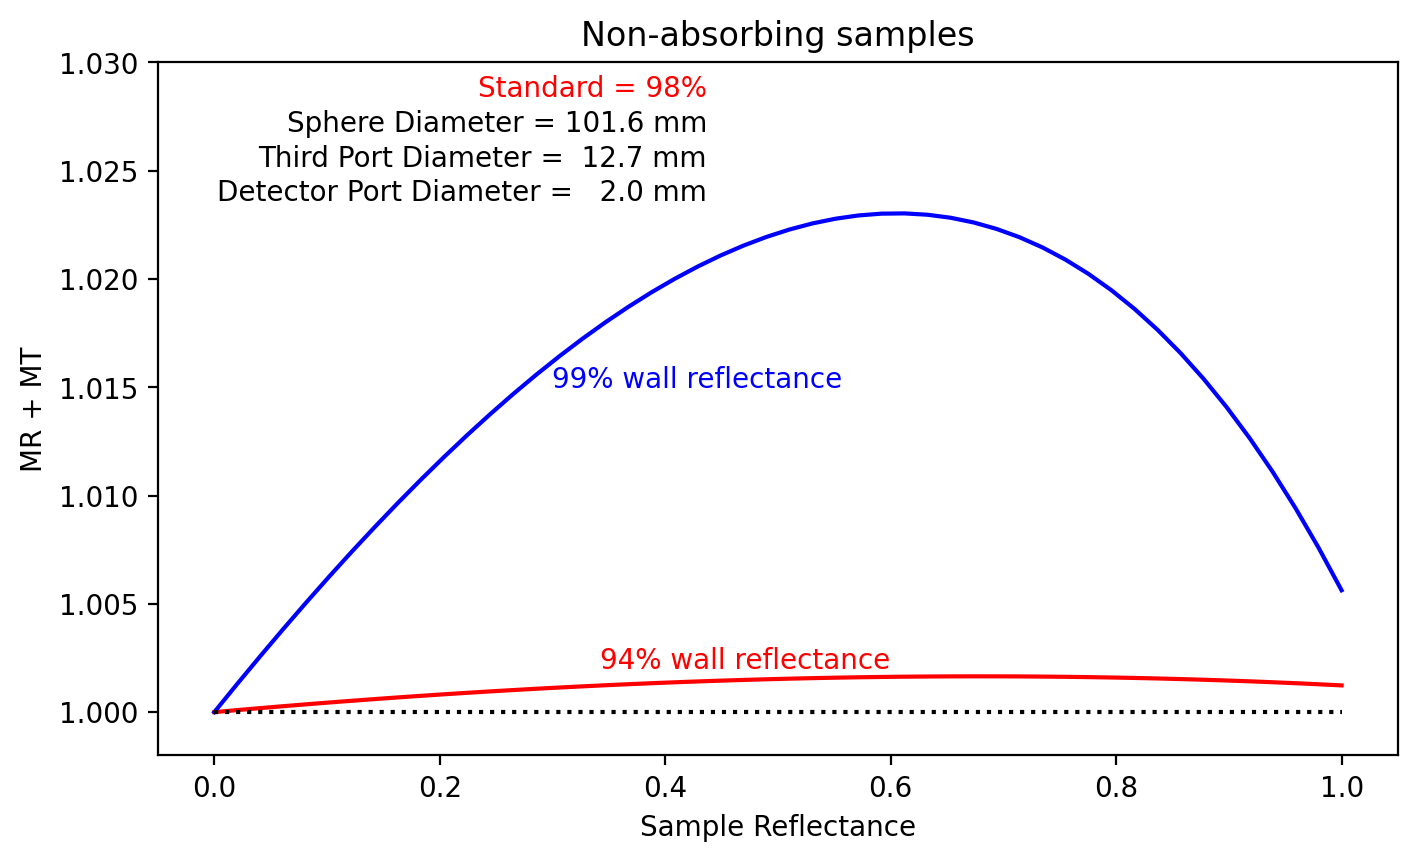

In [3]:
t_sample = np.linspace(0.0,1,50)
r_sample = 1-t_sample
d_sphere = 25.4*4 #mm
d_sample = 25.4/2

s = iadpython.Sphere(d_sphere, d_sample, d_third=25.4/2, d_detector=2)
r_standard = 0.98
s.r_std = r_standard
s.r_third = r_standard

plt.figure(figsize=(8,4.5))
s.r_wall=0.94
MT = s.MT(t_sample, r_sample)
MR = s.MR(r_sample)

plt.plot(r_sample, MR+MT, color='red')
plt.text(0.6,1.002,'%g%% wall reflectance'%(100*s.r_wall), color='red', ha='right')

s.r_wall=0.99
MT = s.MT(t_sample, r_sample)
MR = s.MR(r_sample)
plt.plot(r_sample, MR+MT, color='blue')
plt.text(0.3,1.015,'%g%% wall reflectance'%(100*s.r_wall), color='blue', ha='left')

plt.plot([0,1],[1,1],':k')

plt.xlabel('Sample Reflectance')
plt.ylabel('MR + MT')
plt.title('Non-absorbing samples')
plt.text(0.45,0.90,"Sphere Diameter = %5.1f mm "%s.d, ha='right', transform=plt.gca().transAxes)
plt.text(0.45,0.85,"Third Port Diameter = %5.1f mm "%(s.third.d), ha='right',transform=plt.gca().transAxes)
plt.text(0.45,0.80,"Detector Port Diameter = %5.1f mm "%(s.detector.d), ha='right',transform=plt.gca().transAxes)
plt.text(0.45,0.95,"Standard = %g%% "%(100*r_standard), ha='right',transform=plt.gca().transAxes,color='red')
plt.ylim(0.998,1.03)
plt.show()

### Effect of port size on relative wall radiance

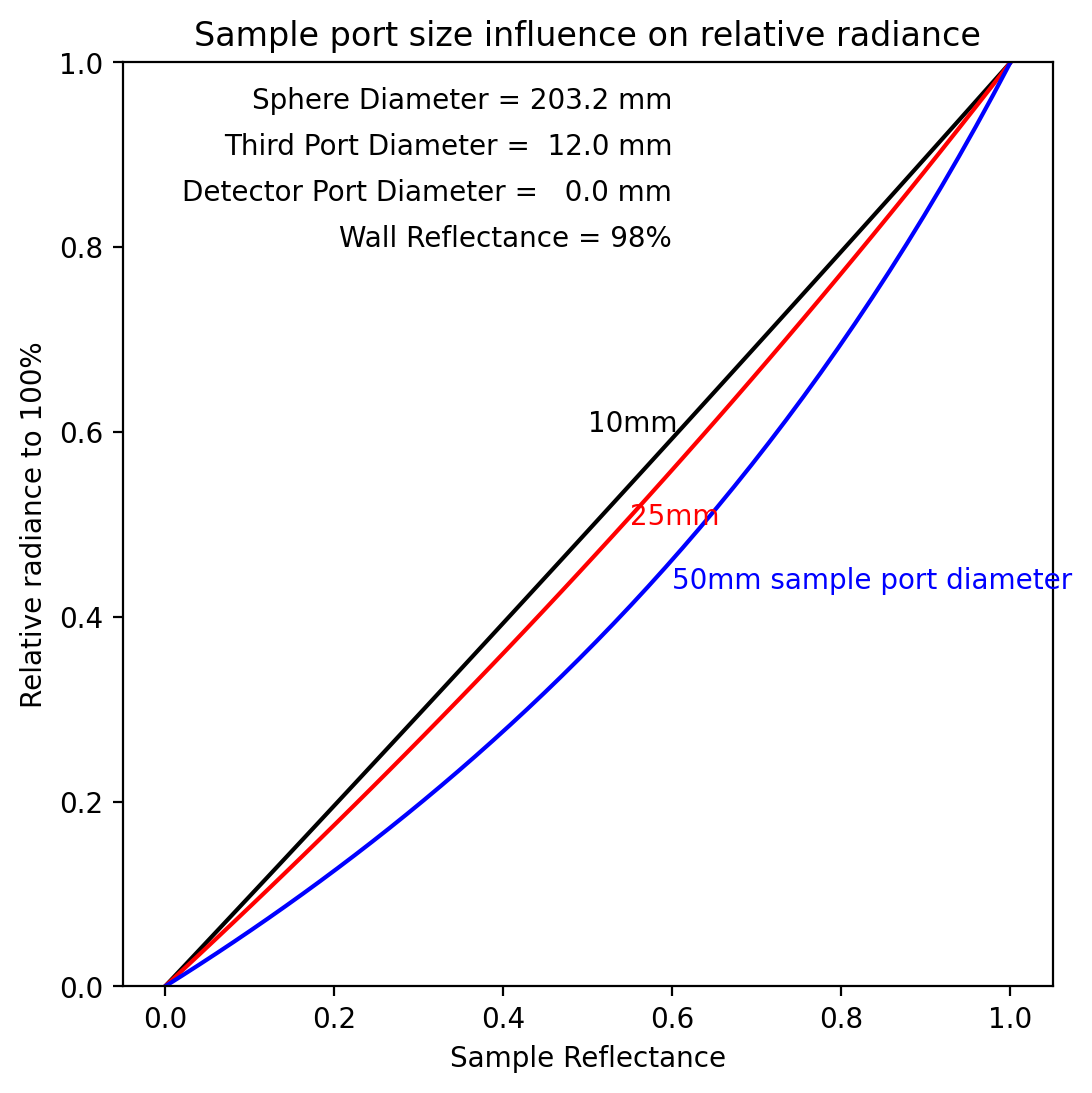

In [4]:
r_sample = np.linspace(0.0,1,50)
s = iadpython.Sphere(25.4*8, 25.4, r_wall=0.98, d_third=12)

plt.figure(figsize=(6,6))

s.sample.d = 10
M = s.MR(r_sample, sample_uru=r_sample)
plt.plot(r_sample, M/np.max(M), color='black')
plt.text(0.5,0.60,'%gmm'%(s.sample.d), color='black')

s.sample.d=25
M = s.MR(r_sample, sample_uru=r_sample)
plt.plot(r_sample, M/np.max(M), color='red')
plt.text(0.55,0.5,'%gmm'%(s.sample.d), color='red')

s.sample.d=50
M = s.MR(r_sample, sample_uru=r_sample)
label='$d_{sample}$=%.2f, %.0fmm sphere'%(s.a_wall,s.d)
plt.plot(r_sample, M/np.max(M), color='blue')
plt.text(0.6,0.43,'%gmm sample port diameter'%(s.sample.d), color='blue')

plt.xlabel('Sample Reflectance')
plt.ylabel('Relative radiance to 100%')
plt.title('Sample port size influence on relative radiance')
plt.text(0.6,0.95,"Sphere Diameter = %5.1f mm"%s.d, ha='right')
plt.text(0.6,0.90,"Third Port Diameter = %5.1f mm"%(s.third.d), ha='right')
plt.text(0.6,0.85,"Detector Port Diameter = %5.1f mm"%(s.detector.d), ha='right')
plt.text(0.6,0.80,"Wall Reflectance = %g%%"%(100*s.r_wall), ha='right')
plt.ylim(0,1)
plt.show()

Here we see the slightly perplexing result that higher wall reflectivities increase non-linearity.  This is follows from the fact that in whiter spheres, the light bounces around more times.  The light has more chances to interact with the sample and therefore the sample ends up having a larger non-linear impact.

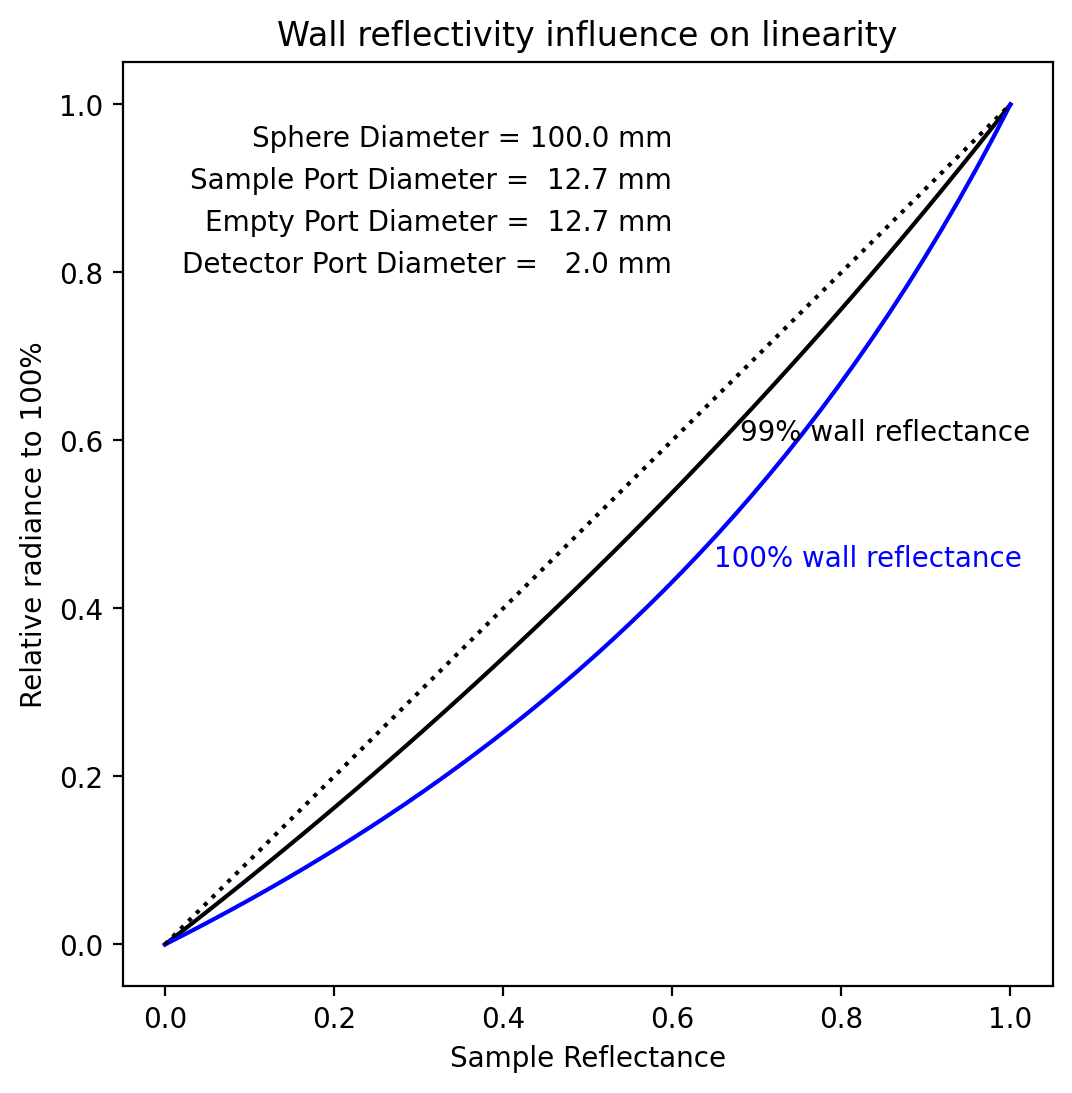

In [5]:
r_sample = np.linspace(0.0,1,50)
s = iadpython.Sphere(100, 12.7, d_third=12.7, d_detector=2)

plt.figure(figsize=(6,6))

s.r_wall=0.99
M = s.MR(r_sample, sample_uru=r_sample)

M100 = M[-1]
plt.plot(r_sample, M/M100, color='black')
plt.text(0.68,0.60,'%g%% wall reflectance'%(100*s.r_wall), color='black', ha='left')

s.r_wall=1.00
M = s.MR(r_sample, sample_uru=r_sample)
plt.plot(r_sample, M/np.max(M), color='blue')
plt.text(0.65,0.45,'%g%% wall reflectance'%(100*s.r_wall), color='blue', ha='left')

plt.plot([0,1],[0,1],':k')
plt.xlabel('Sample Reflectance')
plt.ylabel('Relative radiance to 100%')
plt.title('Wall reflectivity influence on linearity')
plt.text(0.6,0.95,"Sphere Diameter = %5.1f mm"%s.d, ha='right')
plt.text(0.6,0.90,"Sample Port Diameter = %5.1f mm"%(s.sample.d), ha='right')
plt.text(0.6,0.85,"Empty Port Diameter = %5.1f mm"%(s.third.d), ha='right')
plt.text(0.6,0.80,"Detector Port Diameter = %5.1f mm"%(s.detector.d), ha='right')
plt.show()

## A sphere model with baffle but with sample and detector ports

<center>
    <img src="sphere.png" width="70%" />
</center>

### The power on the detector port

Assume that a sphere is illuminated with diffuse light having a power $P$  and that this light reaches all parts of the sphere --- specifically, light from this source is not blocked by a baffle.  Subsequent reflections however are restricted by a baffle located between the sample and detector ports.  Multiple reflections in the sphere will increase the power falling on non-white areas in the sphere (e.g., the sample, detector, and entrance).  To find the total light falling on each area of the sphere, the total power is summed for each successive incidence (followed by a reflection). A superscript denotes the number of times light is incident upon each surface within the sphere and pertains only to the contribution of power for that incidence. The first incidence for the diffuse light is
$$
P_w^{(1)} = a_w P, \qquad P_s^{(1)} = a_s P, \qquad P_d^{(1)} = a_d P, \qquad P_t^{(1)} = a_t P
$$
The second incidence on the wall is
$$
P_w^{(2)} = a_w r_w P_w^{(1)} + (1-a_t) r_d P_d^{(1)} + (1-a_t)r_s  P_s^{(1)} + a_w r_t P_t^{(1)}
$$

The light from the detector and sample is multiplied by $(1-a_t)$ and not by $a_w$ because the light from the detector (and sample) is not allowed to hit either the detector or sample.  The light that hits the walls on the $k$th incidence has the same form as above
$$
P_w^{(k)} = a_w r_w P_w^{(k-1)} + (1-a_t) r_d  P_d^{(k-1)} + (1-a_t) r_s P_s^{(k-1)}+ a_w r_t P_t^{(k-1)}
$$
The light falling on the third port is the same as the walls,
$$
P_t^{(k)}/A_t = P_w^{(k)}/A_w \qquad\mbox{or}\qquad P_t^{(k)} = (a_t/a_w) P_w^{(k)}
$$
Since the light falling on the sample and detector can only arrive from the wall or third port due to a baffle,
$$
P_s^{(k)} = a_s [r_w P_w^{(k-1)} + r_t P_t^{(k-1)}] \qquad\mbox{and}\qquad  P_d^{(k)} = a_d [r_w P_w^{(k-1)} + r_t P_t^{(k-1)}],
$$
or 
$$
P_s^{(k)} = a_s (r_w + a_t r_t /a_w) P_w^{(k-1)} \qquad\mbox{and}\qquad  P_d^{(k)} = a_d (r_w + a_t r_t /a_w) P_w^{(k-1)},
$$
Therefore, the incident light on the wall for the $k$th incidence becomes
$$
P_w^{(k)} = a_w (r_w + a_t r_t /a_w) P_w^{(k-1)} + (1-a_t) (r_w + a_t r_t /a_w) (a_d r_d + a_s r_s) P_w^{(k-2)}
$$
Thus the total power falling the detector is
$$
P_d = P_d^{(1)} + P_d^{(2)} + \sum_{k=3}^\infty a_d (r_w + a_t r_t /a_w) P_w^{(k-1)}
= a_d P + a_d a_w r_w P + a_d (r_w + a_t r_t /a_w) \sum_{k=2}^\infty P_w^{(k)}
$$
which after a lot of algebra is
$$
P_d = a_d \frac{1}{1-(r_w + a_t r_t /a_w)[ a_w + (1-a_t)(a_d r_d + a_s r_s)]} \cdot P
$$

### The gain due to the sphere

The sphere multiplier $G(r_\mathrm{sample})$ is not constant for a particular sphere configuration, but depends on the diffuse reflectance of the sample.  The sphere efficiency changes with the reflectivity of the sample.

The sphere gain $G(r_\mathrm{sample})$ is the increase in light relative to the detector arising from diffuse power $P$ isotropically distributed over the surface of the sphere from the center of a black sphere

$$
G_\text{baffle} = \frac{1}{1-(r_w + a_t r_t /a_w)[ a_w + (1-a_t) (a_d r_d + a_s r_s)]} 
$$

Thus, the gain is one when $r_w=0$ and increase with sphere wall reflectivity.  

Now the initial diffuse power $P = \mathrm{UX1} \cdot [(1-a_t)r_w+a_t r_t]P_0$ so the normalized optical power falling on the detector port is

$$
\frac{P_d}{P_0} = a_d G_\text{baffle} \cdot  \mathrm{UX1}\cdot [(1-a_t)r_w+a_t r_t]
$$

Finally the gain can be found from a Monte Carlo simulation of light bouncing in a sphere using

$$
G_\text{baffle} = \frac{P_\mathrm{detected}}{P_0} \frac{1}{a_\mathrm{detector} (1-r_\mathrm{detector})\cdot \mathrm{UX1}\cdot [(1-a_t)r_w+a_t r_t] }  
$$